In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('urls.csv')
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
def balance_datas():
    frames = []
    for category in data["Label"].unique():
        df_test = data[data["Label"] == category].sample(20000)
        frames.append(df_test)
    x = pd.concat(frames)
    return x

data = balance_datas()

In [8]:
data["Label"].value_counts()

bad     20000
good    20000
Name: Label, dtype: int64

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

In [10]:
data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
tokenizer.tokenize(data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))

In [13]:
data.sample(5)

,URL,Label,text_tokenized
348019,greaterglendaleproperties.net/Schools/CA/Burba...,good,"[greaterglendaleproperties, net, Schools, CA, ..."
366058,john-meekings.co.uk/cpatton.html,good,"[john, meekings, co, uk, cpatton, html]"
33480,www.lineasun63.com/plugins/editors/tinymce/sit...,bad,"[www, lineasun, com, plugins, editors, tinymce..."
358628,imdb.com/name/nm0460477/,good,"[imdb, com, name, nm]"
279198,andybrain.com/2006/vex-robotics-kit-design-sys...,good,"[andybrain, com, vex, robotics, kit, design, s..."


In [14]:
stemmer = SnowballStemmer("english") # choose a language

In [15]:
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [16]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed
267952,absoluteastronomy.com/topics/List_of_Canadian_...,good,"[absoluteastronomy, com, topics, List, of, Can...","[absoluteastronomi, com, topic, list, of, cana..."
130857,fexton.com/components/com_config/GOOGLE_FILE_M...,bad,"[fexton, com, components, com, config, GOOGLE,...","[fexton, com, compon, com, config, googl, file..."
106305,kt-marketing.com/wp-admin/network/admin/docsig...,bad,"[kt, marketing, com, wp, admin, network, admin...","[kt, market, com, wp, admin, network, admin, d..."
254968,video.barnesandnoble.com/DVD/The-Trouble-with-...,good,"[video, barnesandnoble, com, DVD, The, Trouble...","[video, barnesandnobl, com, dvd, the, troubl, ..."
125612,bjcurio.com/js/index.htm?http://us.battle.net/...,bad,"[bjcurio, com, js, index, htm, http, us, battl...","[bjcurio, com, js, index, htm, http, us, battl..."


In [17]:
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))

In [18]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
215101,montrealrentalapartments.com/,good,"[montrealrentalapartments, com]","[montrealrentalapart, com]",montrealrentalapart com
448926,topuniversities.com/institution/university-nor...,good,"[topuniversities, com, institution, university...","[topunivers, com, institut, univers, north, ca...",topunivers com institut univers north carolina...
105685,bonbonban.co.id/klm/GD,bad,"[bonbonban, co, id, klm, GD]","[bonbonban, co, id, klm, gd]",bonbonban co id klm gd
44018,eeb.org.br/wp-inc/login_verify2_home26livecom_...,bad,"[eeb, org, br, wp, inc, login, verify, home, l...","[eeb, org, br, wp, inc, login, verifi, home, l...",eeb org br wp inc login verifi home livecom ma...
99680,pricemistake.com/wp-content/themes/slimwriter/...,bad,"[pricemistake, com, wp, content, themes, slimw...","[pricemistak, com, wp, content, theme, slimwri...",pricemistak com wp content theme slimwrit sing...


In [19]:
#sliceing classes
bad_sites = data[data.Label == 'bad']
good_sites = data[data.Label == 'good']

In [20]:
#create cv object
cv = CountVectorizer()

In [21]:
feature = cv.fit_transform(data.text_sent) #transform all text which we tokenize and stemed

In [22]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
trainX, testX, trainY, testY = train_test_split(feature, data.Label)

In [24]:
import time

--- 1.548854112625122 seconds ---
--- 0.024933338165283203 seconds ---
Training Accuracy : 0.9823
Testing Accuracy : 0.9247

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.95      0.92      4736
        Good       0.95      0.90      0.93      5264

    accuracy                           0.92     10000
   macro avg       0.92      0.93      0.92     10000
weighted avg       0.93      0.92      0.92     10000


CONFUSION MATRIX


<AxesSubplot:>

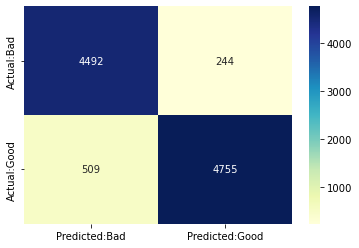

In [25]:
# create lr object
lr = LogisticRegression()
train_time = time.time()
lr.fit(trainX, trainY)
print("--- %s seconds ---" % (time.time() - train_time))

test_time = time.time()
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)
print("--- %s seconds ---" % (time.time() - test_time))

print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

--- 0.1296520233154297 seconds ---
--- 0.022936105728149414 seconds ---
Training Accuracy : 0.9663
Testing Accuracy : 0.9203

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.89      0.95      0.92      4690
        Good       0.95      0.90      0.92      5310

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


CONFUSION MATRIX


<AxesSubplot:>

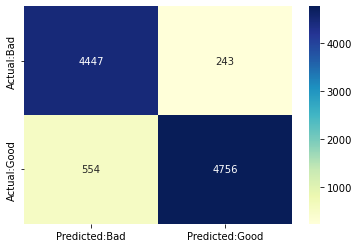

In [26]:
# create mnb object
mnb = MultinomialNB()
train_time = time.time()
mnb.fit(trainX, trainY)
print("--- %s seconds ---" % (time.time() - train_time))

test_time = time.time()
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)
print("--- %s seconds ---" % (time.time() - test_time))

print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")